In [34]:
# Lets go learning Python

In [35]:
# CEci est un commentaire dans la cellule de code
#Python est une programmation orienté objet. On définit des variables
name = "Thomas"
print (name)

#La dernière def de variable l'emporte


Thomas


In [36]:
# un dictionnaire c'est CLE VALEUR

prices = {"AAPL":248.04,"GOOGL" : 328.05}
prices

{'AAPL': 248.04, 'GOOGL': 328.05}

In [37]:
#Comment avoir les donneés boursières ? 
# En effet on ne va pas recopier a la main les dictionnaires 
# DOnc on utilise les packages
! pip install yfinance
# DL package YAHOO FINANCE


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip


# La structure d'un projet python : Une cellule ou l'on importe tous les packages 
Comme ça on a une overview des dependances 

In [38]:
!pip install matplotlib


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [39]:
import yfinance as yf

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
ticker = "AAPL"

In [42]:
# 1. Une fonction qui est def dans ce package pour EXTRAIRE la donnée
data = yf.download(ticker, start="2020-01-01", auto_adjust= False,)
#Variable . fonction(parametre)


[*********************100%***********************]  1 of 1 completed


In [43]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.468254,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.763725,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.335556,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,71.995346,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.153496,75.797501,76.110001,74.290001,74.290001,132079200
...,...,...,...,...,...,...
2026-01-26,255.410004,255.410004,256.559998,249.800003,251.479996,55969200
2026-01-27,258.269989,258.269989,261.950012,258.209991,259.170013,49648300


In [44]:
data.head() #5 première du dataset

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2020-01-02,72.468254,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03,71.763725,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06,72.335556,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07,71.995346,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08,73.153496,75.797501,76.110001,74.290001,74.290001,132079200


In [45]:
data.tail() #5 dernière du dataset

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2026-01-26,255.410004,255.410004,256.559998,249.800003,251.479996,55969200
2026-01-27,258.269989,258.269989,261.950012,258.209991,259.170013,49648300
2026-01-28,256.440002,256.440002,258.859985,254.509995,257.649994,41288000
2026-01-29,258.279999,258.279999,259.649994,254.410004,258.000000,67253000
2026-01-30,259.480011,259.480011,261.899994,252.179993,255.169998,92352600


In [46]:
# Pypfopt + empyrical + risk-kit => package a dl 
# scikit-learn + tensorflow + Aladdin (BLK)=> package machine learning

In [47]:
# importer un fichier Local > Cloud => Drag and drop

In [48]:
# 2. Calculer les rdmts journaliers (Daily returns)
# On utilise le 'Adj Close' (Prix ajusté aux dividens/splits)

data['Returns'] = data ['Adj Close'].pct_change()

# 3. Calculer la volatilité et le rendement moyen (Annualisés)
# Il y a environ 252 jours de trading par an
mean_return_daily = data['Returns'].mean()
volatility_daily = data['Returns'].std()

annualized_return = mean_return_daily * 252
annualized_volatility = volatility_daily * np.sqrt(252)

#4. calucl sur sharpe ratio ( taux sans risque de 2%)

sharpe_ratio = annualized_return / annualized_volatility

print(f"--- Analyse pour {ticker} ---")
print(f"Rendement annualisé : {annualized_return: .2%}")
print(f"Volatilité Annualisée : {annualized_volatility: .2%}")

--- Analyse pour AAPL ---
Rendement annualisé :  26.06%
Volatilité Annualisée :  31.69%


Text(0.5, 0, 'Date')

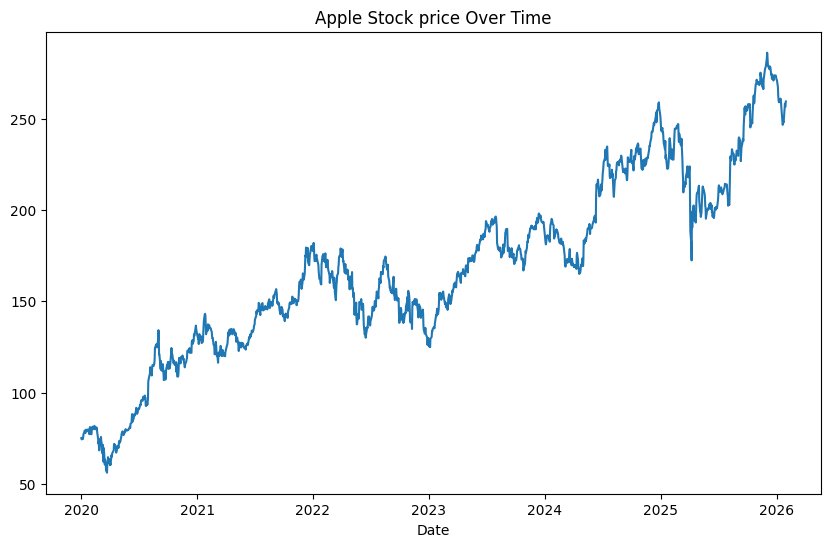

In [49]:
# Plot it
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label = 'AAPL Closing Price')
plt.title ('Apple Stock price Over Time')
plt.xlabel('Date')